In [12]:
# quiero que imprima los valores actuaqles de los splines siendo la pendiente m = -3 en x = 0
for i, x_i in enumerate(xs[:-1]):
    print(f"Spline S{i}(x):")
    for x in np.linspace(x_i, xs[i + 1], 5):
        print(f"Spline S{i}({x}) = {Spline(x, x_i, s[i])}")
        
    

Spline S0(x):
Spline S0(-1.0) = 1.0
Spline S0(-0.75) = 2.3515625
Spline S0(-0.5) = 3.5625
Spline S0(-0.25) = 4.4921875
Spline S0(0.0) = 5.0
Spline S1(x):
Spline S1(0.0) = 5.0
Spline S1(0.25) = 4.9921875
Spline S1(0.5) = 4.5625
Spline S1(0.75) = 3.8515625
Spline S1(1.0) = 3.0


 Spline S0(x) en [-1, 0]:
     3       2          
  7⋅x    21⋅x           
- ──── - ───── - 3⋅x + 5
   2       2            

 Spline S1(x) en [0, 1]:
   3       2          
7⋅x    21⋅x           
──── - ───── + 5⋅x + 5
 2       2            

Coeficientes de S0:
a0 = 1
b0 = 15/2
c0 = 0
d0 = -7/2

Coeficientes de S1:
a1 = 5
b1 = 5
c1 = -21/2
d1 = 7/2

Spline S0(x):
S0(x) = 1 + 15/2*(x - -1) + 0*(x - -1)**2 + -7/2*(x - -1)**3

Spline S1(x):
S1(x) = 5 + 5*(x - 0) + -21/2*(x - 0)**2 + 7/2*(x - 0)**3


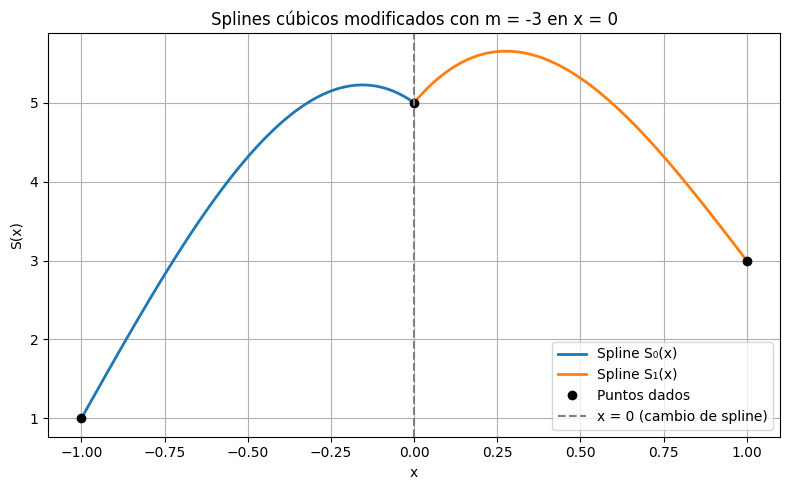

In [15]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# --- Variables simbólicas ---
x = sp.Symbol('x')
x0, y0 = -1, 1
x1, y1 = 0, 5
x2, y2 = 1, 3

# --- Splines cúbicos ---
a0, b0, c0, d0 = sp.symbols('a0 b0 c0 d0')
S0 = a0 + b0*(x - x0) + c0*(x - x0)**2 + d0*(x - x0)**3

a1, b1, c1, d1 = sp.symbols('a1 b1 c1 d1')
S1 = a1 + b1*(x - x1) + c1*(x - x1)**2 + d1*(x - x1)**3

S0_prime = sp.diff(S0, x)
S1_prime = sp.diff(S1, x)
S0_double = sp.diff(S0_prime, x)
S1_double = sp.diff(S1_prime, x)

ecuaciones = [
    S0.subs(x, x0) - y0,
    S0.subs(x, x1) - y1,
    S1.subs(x, x1) - y1,
    S1.subs(x, x2) - y2,
    S0_prime.subs(x, x1) + 3,               # pendiente deseada m = -3
    S0_double.subs(x, x0),                  # condición natural izquierda
    S1_double.subs(x, x2),                  # condición natural derecha
    S0_double.subs(x, x1) - S1_double.subs(x, x1)  # continuidad segunda derivada
]

# --- Resolver el sistema ---
variables = [a0, b0, c0, d0, a1, b1, c1, d1]
sol = sp.solve(ecuaciones, variables)

# --- Sustituir las soluciones ---
S0_final = sp.simplify(sp.expand(S0.subs(sol)))
S1_final = sp.simplify(sp.expand(S1.subs(sol)))

print(" Spline S0(x) en [-1, 0]:")
sp.pprint(S0_final)

print("\n Spline S1(x) en [0, 1]:")
sp.pprint(S1_final)

print("\nCoeficientes de S0:")
for var in [a0, b0, c0, d0]:
    print(f"{var} = {sol[var]}")
print("\nCoeficientes de S1:")
for var in [a1, b1, c1, d1]:
    print(f"{var} = {sol[var]}")
    
# imprimir asi Si(x)=ai+bi(x−xi)+ci(x−xi)2+di(x−xi)3 el resultado final
print("\nSpline S0(x):")
print(f"S0(x) = {sol[a0]} + {sol[b0]}*(x - {x0}) + {sol[c0]}*(x - {x0})**2 + {sol[d0]}*(x - {x0})**3")
print("\nSpline S1(x):")
print(f"S1(x) = {sol[a1]} + {sol[b1]}*(x - {x1}) + {sol[c1]}*(x - {x1})**2 + {sol[d1]}*(x - {x1})**3")

S0_func = sp.lambdify(x, S0_final, modules='numpy')
S1_func = sp.lambdify(x, S1_final, modules='numpy')

x_vals0 = np.linspace(x0, x1, 100)
x_vals1 = np.linspace(x1, x2, 100)
y_vals0 = S0_func(x_vals0)
y_vals1 = S1_func(x_vals1)


plt.figure(figsize=(8, 5))
plt.plot(x_vals0, y_vals0, label='Spline S₀(x)', linewidth=2)
plt.plot(x_vals1, y_vals1, label='Spline S₁(x)', linewidth=2)
plt.plot([x0, x1, x2], [y0, y1, y2], 'o', label='Puntos dados', color='black')
plt.axvline(x=x1, color='gray', linestyle='--', label='x = 0 (cambio de spline)')
plt.title('Splines cúbicos modificados con m = -3 en x = 0')
plt.xlabel('x')
plt.ylabel('S(x)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
